# 이상치 정제

1. 결측치 정제를 우선적으로 수행
2. 이상치 찾기 - 상자그림을 통해 이상치가 존재하는 변수를 찾는다.
    - 분석가의 주관에 따라 특정 범위를 벗어난 값을 이상치로 정의한다.
    - 이상치가 발견된 변수의 극단치 경계값을 계산하여 처리한다.
3. 이상치를 결측치로 변경
4. 결측치 정제 방법 적용

## #01. 준비과정

### [1] 패키지 참조

In [1]:
import numpy as np
from pandas import read_excel, DataFrame
from sklearn.impute import SimpleImputer

### [2] 데이터 가져오기

In [2]:
origin = read_excel("https://data.hossam.kr/pydata/ref_sample.xlsx", 
                    index_col="name")
#origin.loc['kk'] = [100, 100, 100, 100]
origin

,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


## #02. 결측치 정제하기

In [3]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr, index=origin.index, columns=origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


## #03. 이상치가 존재하는 변수 찾기

### [1] 상자그림 확인

데이터의 중심과 산포를 확인하는데 유용한 시각화 자료.

주로 데이터의 정규성을 확인하거나 이상치일 가능이 있는 데이터를 찾아내기 위한 도구로 활용된다.

1. 각 변수별로 네모 상자가 데이터의 정상 범위(사분위수 범위)를 의미
2. 변수에 동그라미가 표시되는 경우 해당 값이 이상치임을 의미

<Axes: >

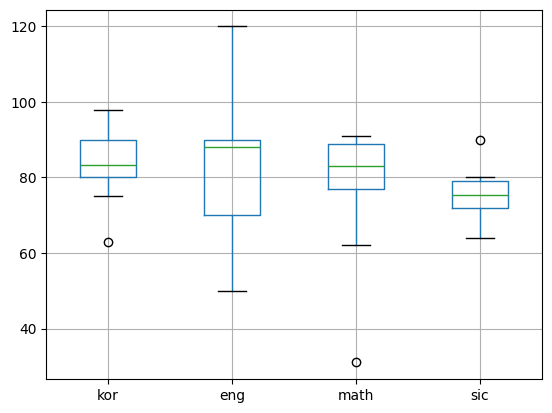

In [4]:
re_df.boxplot()

### [2] 찾아낸 이상치 판별

1. 상자그림을 통해 검출된 국어, 수학, 과학 점수
2. 분석가의 주관에 따른 영어 점수 (`영어점수 > 100`)

## #04. 분석가의 주관에 따른 이상치 판별

점수가 아무리 낮더라도 정상 점수 범위(`0~100`)라면 답안지를 밀려 썼거나 시험중 실수가 발생했을 수 있다.

이 경우 정상적인 시험 결과로 간주하는 것이 옳다고 판단.

정상 점수 범위(`0~100`)를 벗어난 경우라면 채점에 오류가 있을 수 있다고 판단하여 이상치로 판별해야 한다.

### [1] 이상치를 결측치로 변경

In [5]:
re_df.loc[re_df['eng'] > 100, 'eng'] = np.nan
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### [2] 변경된 결측치에 대한 처리

In [6]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr, index=re_df.index, columns=re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


## #05. 극단치 경계값을 계산하여 이상치 찾기

### [1] 사분위수의 이해

데이터 표본을 4개의 동일한 부분으로 나눈 값.

데이터를 순서대로 정렬하여 `25%`, `50%`, `75%`되는 지점의 수치를 **계산한 값**ㄷ

사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있다.

이는 데이터를 이해하는 데 중요한 첫 번째 단계이다.

### [2] 사분위 수의 종류

| 용어 | 설명 |
|--|--|
| 1사분위 수(Q1)     | 데이터의 하위 25%가 이 값보다 작거나 같음.             |
| 2사분위 수(Q2)     | 중위수 혹은 중앙값이라고도 함<br/>데이터의 50%가 이 값보다 작거나 같음. |
| 3사분위 수(Q3)     | 데이터의 하위 75%가 이 값보다 작거나 같음.(=상위 25%)  |
| 사분위간 범위(IQR) | 3사분위 수부터 1사분위 수 구간                         |

-   사분위수는 데이터의 관측치가 아닌 계산된 값이다.
-   실존하지 않는 값이기 때문에 사분위수를 정확하게 계산하려면 종종 두 관측치 사이를 보간해야 한다.
-   중위수와 사분위간 범위는 극단치의 영향을 받지 않기 때문에 평균 및 표준 편차보다 치우침이 많은 데이터의 중심 위치와 범위의 더 나은 측도가 될 수 있다.

> ex) 직장인의 평균 급여보다는 중위소득이 더 나은 측도가 될 수 있다.

### [3] 수식을 활용하여 사분위수 구하기

#### (1) 국어점수에 대한 1사분위 수

##### 1사분위 수의 index

$Q_1 = ((총도수 - 1) \times 0.25) + 1$      

(여기서 총도수 -1 은 자유도의 개념. +1은 파이썬 보정값.)

In [26]:
freq = len(outline_df['kor'])
Q1 = (freq + 1) * 0.25 -1
Q1

1.5

##### 실제 1사분위수 데이터

Q1의 값이 `3.25`이므로 인덱스가 3인 위치의 데이터를 선택

In [27]:
outline_df['kor'].sort_values().values[round(Q1)]

82.0

#### (2) 국어점수에 대한 2사분위 수

| 구분 | 설명 | 통계식 |
|---|---|---|
| 데이터의 수가 홀수 | 모든 값을 순서대로 정렬한 후 가운데 위치의 값.<br/>`1, 2, 3, 4, 5`의 중앙값은 `3`이다. |  $m_e = x{(\frac{n+1}2)}$ |
| 데이터의 수가 짝수 | 모든 값을 순서대로 정렬한 후 가운데 두 값의 평균.<br/> `1, 2, 3, 4, 5, 6`의 중앙값은 `(3+4)/2`이므로 `3.5`이다. | $m_e = \frac{1}{2}{({x{\frac{n}{2}} + {x{\frac{n+1}{2}}}})}$ |


In [9]:
freq = len(outline_df['kor'])
v = outline_df['kor'].sort_values().values
v

array([63.   , 75.   , 80.   , 82.   , 83.375, 88.   , 90.   , 91.   ,
       98.   ])

In [10]:
if freq % 2 == 0:
    p = round(freq/2)
    q = round((freq+1)/2)
    print((v[p] + v[q])/2)
else:
    print(v[round((freq+1)/2)])

88.0


#### (3) 국어점수에 대한 3사분위 수

##### 3사분위 수의 인덱스

$Q_3 = ((총도수 - 1) * 0.75) + 1$

In [23]:
freq = len(outline_df['kor'])
Q3 = (freq + 1) * 0.75 - 1
Q3

6.5

##### 3사분위 수의 실제 데이터

$Q_3$가 `7.75`이므로 인덱스가 8인 위치의 데이터 선택

In [24]:
outline_df['kor'].sort_values().values[round(Q3)]

91.0

### [4] 파이썬 기능을 활용한 사분위수 구하기

In [25]:
print("Q1:", outline_df['kor'].quantile(0.25))
print("Q2:", outline_df['kor'].quantile(0.5))
print("Q2:", outline_df['kor'].median())
print("Q3:", outline_df['kor'].quantile(0.75))

Q1: 81.5
Q2: 85.6875
Q2: 85.6875
Q3: 90.25


### [5] 사분위간 범위

$iqr = Q_3 - Q_1$

In [14]:
Q1 = outline_df['kor'].quantile(0.25)
Q3 = outline_df['kor'].quantile(0.75)
iqr = Q3 - Q1
print("사분위간 범위:", iqr)

사분위간 범위: 10.0


### [6] 극단치 경계

데이터가 극단적으로 크거나 작은 값을 극단치(=이상치)라고 한다.

그 값을 결정하는 기준이 되는 값을 극단치 경계

| 구분 | 수식 |
|---|---|
| 상한 극단치 경계 | $상한 = Q_3 + iqr * 1.5$ |
| 하한 극단치 경계 | $하한 = Q_1 - iqr * 1.5$ |

In [15]:
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

상한 극단치 경계: 105.0
하한 극단치 경계: 65.0


### [7] 극단치 경계값을 활용한 이상치 찾기

#### 하한 이상치 확인

원하는 행을 검색하기 위해 표현식을 사용한 경우

In [16]:
outline_df.loc[outline_df['kor'] <= outline_min, 'kor']

name
수현    63.0
Name: kor, dtype: float64

#### 하한 이상치를 결측치로 변환

In [17]:
outline_df.loc[outline_df['kor'] <= outline_min, 'kor'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### 상한 이상치를 검색하여 결측치로 변환

원하는 행을 검색하기 위해 `query()` 메서드를 사용한 경우

> 하지만 `kor`에서는 상한 극단치는 없다.

In [18]:
outline_df.query("kor > @outline_max")['kor'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### [8] 지금까지의 과정을 일괄 처리하기

#### (1) 영어 점수에 대한 처리

> 상자그림에서 확인했을 때 영어 점수에는 이상치가 없었으므로 아래의 코드로 영어점수에 결측치가 추가되는 않는다.

In [19]:
Q1 = outline_df['eng'].quantile(0.25)
Q3 = outline_df['eng'].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

outline_df.loc[outline_df['eng'] <= outline_min, 'eng'] = np.nan
outline_df.loc[outline_df['eng'] >= outline_max, 'eng'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### (2) 수학 점수에 대한 처리

In [20]:
Q1 = outline_df['math'].quantile(0.25)
Q3 = outline_df['math'].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

outline_df.loc[outline_df['math'] <= outline_min, 'math'] = np.nan
outline_df.loc[outline_df['math'] >= outline_max, 'math'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### (3) 과학점수에 대한 처리

In [21]:
Q1 = outline_df['sic'].quantile(0.25)
Q3 = outline_df['sic'].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

outline_df.loc[outline_df['sic'] <= outline_min, 'sic'] = np.nan
outline_df.loc[outline_df['sic'] >= outline_max, 'sic'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,NaN
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### [9] 결측치로 변환된 값을 처리

In [22]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(outline_df.values)
final_df = DataFrame(df_imr, index=outline_df.index, columns=outline_df.columns)
final_df

,kor,eng,math,sic
name,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
